# Explore here

In [2]:
import pandas as pd

url = "https://raw.githubusercontent.com/4GeeksAcademy/k-means-project-tutorial/main/housing.csv"
data = pd.read_csv(url)

# Seleccionar las columnas necesarias
data = data[['Latitude', 'Longitude', 'MedInc']]

from sklearn.model_selection import train_test_split

train, test = train_test_split(data, test_size=0.2, random_state=42)

from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=6, random_state=42)
train['cluster'] = kmeans.fit_predict(train[['Latitude', 'Longitude', 'MedInc']])
test['cluster'] = kmeans.predict(test[['Latitude', 'Longitude', 'MedInc']])

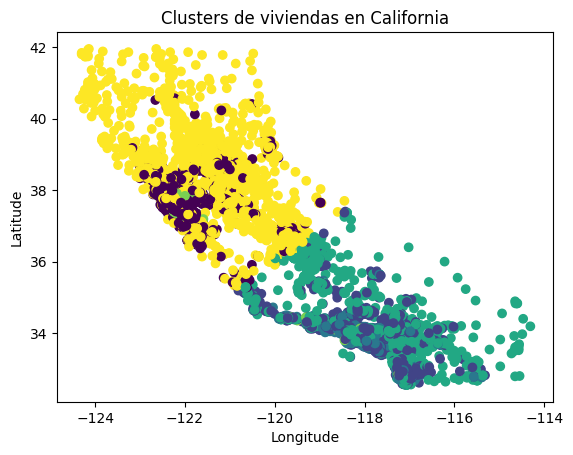

In [7]:
import matplotlib.pyplot as plt

plt.scatter(train['Longitude'], train['Latitude'], c=train['cluster'], cmap='viridis')
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.title("Clusters de viviendas en California")
plt.show()


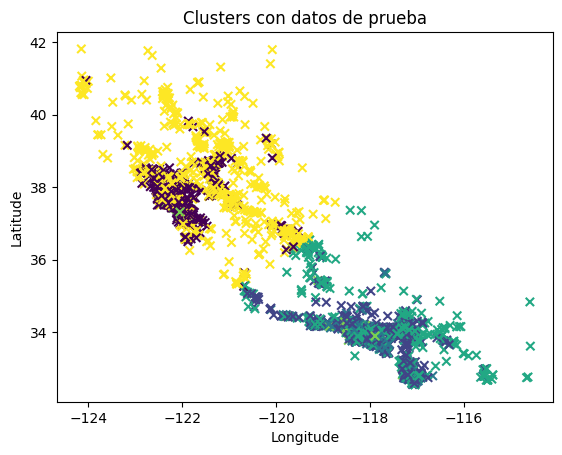

In [8]:
plt.scatter(test['Longitude'], test['Latitude'], c=test['cluster'], cmap='viridis', marker="x")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.title("Clusters con datos de prueba")
plt.show()

In [5]:
from sklearn.ensemble import RandomForestClassifier

X_train, y_train = train[['Latitude', 'Longitude', 'MedInc']], train['cluster']
X_test, y_test = test[['Latitude', 'Longitude', 'MedInc']], test['cluster']

clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)
accuracy = clf.score(X_test, y_test)
print(f'Precisión del modelo supervisado: {accuracy:.2f}')

Precisión del modelo supervisado: 1.00


In [6]:
import pickle

# Guardar modelos
with open("kmeans_model.pkl", "wb") as file:
    pickle.dump(kmeans, file)

with open("classification_model.pkl", "wb") as file:
    pickle.dump(clf, file)